# Quick demo of using sklearn for regression

This demo, based upon some work by [Dr. Mike Hughes](https://www.michaelchughes.com), covers use of the nearest-neighbors regression functions in sci-kitlearn:

* KNeighborsRegressor  : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

You can see below uses of 'fit' and 'predict' for a 1-dim input to 1-dim output regression task based on the "abalone" dataset from UCI.

In [1]:
# imports and setup
import numpy as np
import seaborn as sns
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

## Load data from csv file

Data is from the UCI repository, and based upon Nash, et al. (1994):

* https://archive.ics.uci.edu/ml/datasets/Abalone

In [2]:
with open('data_abalone/x_train.csv', 'r') as infile:
    for line in infile.readlines()[:10]:
        print(line.strip())

is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0.0,0.43,0.325,0.09,0.425,0.217,0.087,0.095
0.0,0.575,0.445,0.135,0.883,0.381,0.2035,0.26
0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275
0.0,0.48,0.35,0.1,0.519,0.2365,0.1275,0.126
0.0,0.7,0.555,0.22,1.666,0.647,0.4285,0.455
0.0,0.28,0.12,0.075,0.117,0.0455,0.029,0.0345
0.0,0.48,0.355,0.11,0.4495,0.201,0.089,0.14
0.0,0.515,0.39,0.14,0.5555,0.2,0.1135,0.2235
1.0,0.575,0.455,0.185,1.156,0.5525,0.243,0.295


In [3]:
x_df = pd.read_csv('data_abalone/x_train.csv')
x_NF = x_df.values.copy()

### Regression Demo

Regression of `rings` given `length` of abalone

#### Keep only specific column related to length

In [4]:
xlength_N1 = x_NF[:, 1:2]
xlength_N1.shape

(3176, 1)

### Load in 'rings' data from y_train.csv

In [5]:
y_df = pd.read_csv('data_abalone/y_train.csv')
y_N = y_df.values[:,0]
y_N.shape

(3176,)

### 1-Nearest Neighbor Regression: length -> rings

In [6]:
# Fit a 1-nearest-neighbor model to the data
import sklearn.neighbors

k1nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=1, algorithm='brute', metric='euclidean')

k1nn_regr.fit(xlength_N1, y_N)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

#### Predict with K=1 neighbors

Show the predictions at G=100 evenly spaced example lengths

Remember, calls to predict always need to have shape (n_examples x n_features)

Since we have one feature, we use [:,np.newaxis] to expand a G-shape into a (G,1) shape array

In [7]:
x_grid_G = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)
print(x_grid_G)

[0.07 0.08 0.09 0.1  0.1  0.11 0.12 0.13 0.13 0.14 0.15 0.16 0.16 0.17
 0.18 0.19 0.19 0.2  0.21 0.22 0.22 0.23 0.24 0.25 0.25 0.26 0.27 0.28
 0.28 0.29 0.3  0.31 0.31 0.32 0.33 0.34 0.34 0.35 0.36 0.37 0.37 0.38
 0.39 0.4  0.4  0.41 0.42 0.43 0.43 0.44 0.45 0.46 0.46 0.47 0.48 0.49
 0.49 0.5  0.51 0.52 0.52 0.53 0.54 0.55 0.55 0.56 0.57 0.58 0.58 0.59
 0.6  0.61 0.61 0.62 0.63 0.64 0.64 0.65 0.66 0.67 0.67 0.68 0.69 0.7
 0.7  0.71 0.72 0.73 0.73 0.74 0.75 0.76 0.76 0.77 0.78 0.79 0.79 0.8
 0.81 0.81]


In [8]:
# Reshape the data:
x_grid_G = x_grid_G[:,np.newaxis]
x_grid_G[:10]

array([[0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.13],
       [0.14]])

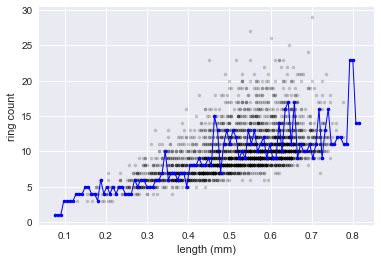

In [9]:
# Predict on the new x-values, plot the result.
yhat_k1nn_G = k1nn_regr.predict(x_grid_G)

# Predicted values shown as line; original data are dots.
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_k1nn_G, 'b.-', linewidth=1);
plt.xlabel('length (mm)'); plt.ylabel('ring count');

### 5-Nearest Neighbor Regression: length -> rings

Fit a 5-neighbor model, so the averages are less noisy.

In [10]:
k5nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5, algorithm='brute', metric='euclidean')
k5nn_regr.fit(xlength_N1, y_N)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### Predict

Show the predictions at G=100 evenly spaced example lengths

In [11]:
x_grid_G = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)[:, np.newaxis]
yhat_k5nn_G = k5nn_regr.predict(x_grid_G)

#### Visualize predictions and training data for 5 neighbors

We should see a smoother prediction function (line plot), as we are averaging over the ring count number of the 5 points nearest to any given length value in `x_grid_G`.

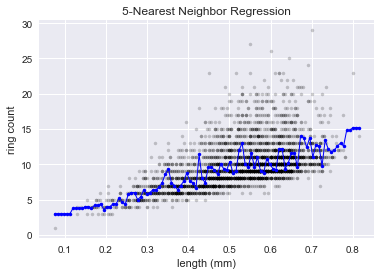

In [13]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_k5nn_G, 'b.-', linewidth=1);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('5-Nearest Neighbor Regression');